# Simulating genetic mutations

## Problem 01

### Background
The built-in library `random` (see [documentation](https://docs.python.org/3/library/random.html)) contains a variety of functions for tasks such as generating random numbers, generating random draws from lists, etc.


In [1]:
import random

One of the simplest functions in the `random` library is itself called `random` (i.e.  `random.random()`).  The `random` function returns a random floating point value in the range [0,1) (i.e. from 0 up to but not including 1). Every time we call the `random` function we get a different value in this range (all values are equally likely, thus we refer to the probabilities as being "uniform").

In [2]:
random.random() # you get a different number everytime you call it

0.5408453651958652

In [3]:
random.random()

0.7577553667246536

Random number generators are useful for simulating stochastic events off all sorts.  For example, if we wanted to simulate flips of a fair coin we could write a function like so that uses `random.random`:

In [4]:
def flip_coin():
    if random.random() < 0.5:
        return "heads"
    else:
        return "tails"

In [5]:
flip_coin()  # re-evaluate this cell multiple times

'heads'

To simulate multiple coin flips we could call this function in a for-loop or list comprehension:

In [6]:
[flip_coin() for i in range(10)] # simulate 10 coin flips

['heads',
 'tails',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'heads',
 'heads',
 'heads']

For such a simple simulation you might skip writing the function and let True/False values indicate heads and tails:

In [7]:
[random.random() < 0.5 for i in range(10)]  # True = heads, False = tails

[False, False, True, True, False, True, True, False, True, True]

If you wanted to keep track of **which** coin flips produced heads you might rewrite the list comprehension like so:

In [8]:
[i for i in range(10) if random.random() < 0.5]  # track which coin flips yielded heads

[1, 4, 6, 8]

### QUESTION 1a (3 pts)

How can we use `random.random` to simulate the **number of mutations**  occuring randomly across a single genome during a single round of replication?  For purposes of implementation, assume the genome size is 30,000 bp and the mutation rate is $10^{-6}$ (i.e. similar to the estimates for COVID-19).

In [9]:
#[random.random() < 10e-6 for i in range(30000)]
[i for i in range(30000) if random.random() < 1e-6]

[]

In [10]:
len([i for i in range(30000) if random.random() < 1e-6])

1

## Problem 02

### Background

The NumPy library also includes a sub-module called random (`numpy.random`) that includes a function called `random` (i.e. `numpy.random.random`).  The chief difference between `random.random` and `numpy.random.random` is we can specify a size argument to the numpy version, which allows us to generate arrays of random numbers rather than just a single random number.

In [11]:
import numpy as np

In [12]:
np.random.random(size=10) # generate 10 random numbers in range [0,1)

array([0.00434802, 0.74337388, 0.23404641, 0.2763279 , 0.92141335,
       0.79694693, 0.70070177, 0.02973813, 0.49474956, 0.95255314])

Similar to what we did above with list comprehensions, we can simulate multiple coin flips using `numpy.random.random` like so:

In [13]:
np.random.random(size=10) < 0.5

array([ True,  True,  True, False,  True, False, False, False,  True,
        True])

If we wanted to figure out which coin flips gave heads (i.e. True) we need to get the indices of the True values in such an array. To do so we can use the function `numpy.argwhere` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html)) which returns the  indices of array elements that are non-zero  (in a Boolean array `True` is considered non-zero, `False` is zero).

In [14]:
heads_or_tails = np.random.random(size=10) < 0.5
np.argwhere(heads_or_tails)

array([[1],
       [2],
       [4],
       [9]], dtype=int64)

`numpy.argwhere` groups the indices by element (this turns out to be convenient for multi-dimensional arrays which we'll see below), returning a "column" array as shown above. For our purposes it will be convenient to "flatten" the array into a single row like so:

In [15]:
np.argwhere(heads_or_tails).flatten()  # these are the indices of the values 
                                       # that are True

array([1, 2, 4, 9], dtype=int64)

If we wanted to get the number of heads (i.e. True) values in the `heads_or_tails` array, we can do so using the `sum` method:

In [16]:
# When summing a boolean array, True = 1, False = 0
heads_or_tails.sum() 

4

### Question 2a (3 pts)

How can we use `numpy.random.random` to simulate the **number of mutations**  occuring randomly across a single genome during a single round of replication?  Again, assume the genome size is 30,000 bp and the mutation rate is $10^{-6}$ (i.e. similar to the estimates for COVID-19).

In [17]:
number_mutations = np.random.random(size=30000) < 1e-6
#print(np.argwhere(number_mutations).flatten())
print(number_mutations.sum())

0


## Problem 03

### Background

The size argument to the `numpy.random.random` function can be multidimensonal. This is useful if we want to generate multiple vectors of random numbers simultaneously.  For example, if we wanted to simulate 5 people, each flipping a coin 10 times we could do so like this:

In [18]:
multi_heads_or_tails = np.random.random(size=(5, 10)) < 0.5  # each row in this 2D array will be a "person"
multi_heads_or_tails

array([[False, False, False, False,  True, False,  True, False, False,
         True],
       [ True, False, False, False,  True, False, False, False,  True,
        False],
       [ True, False, False, False,  True,  True, False,  True,  True,
        False],
       [False, False,  True,  True,  True,  True,  True,  True, False,
         True],
       [ True, False, False,  True,  True,  True, False,  True, False,
         True]])

To get the outcome for a single person, we can index this array by rows:

In [19]:
multi_heads_or_tails[0]  # first person's coin flips

array([False, False, False, False,  True, False,  True, False, False,
        True])

If we wanted to get the list of flips that were heads for each person we could do something like this:

In [20]:
head_flips = []
for row in multi_heads_or_tails:
    heads = np.argwhere(row).flatten()
    head_flips.append(heads)
    
head_flips

[array([4, 6, 9], dtype=int64),
 array([0, 4, 8], dtype=int64),
 array([0, 4, 5, 7, 8], dtype=int64),
 array([2, 3, 4, 5, 6, 7, 9], dtype=int64),
 array([0, 3, 4, 5, 7, 9], dtype=int64)]

If instead of the indices where each person got heads, we wanted the number of heads each person got, we could again use the `sum` method, but since we're dealing with a multidimensional array we need to specify the dimension we want to sum across:

In [21]:
multi_heads_or_tails.sum(axis=1)  # axis=1 means sum across columns (i.e. within rows)
                                  # axis=0 would mean sum across rows (i.e. within columns)

array([3, 3, 5, 7, 6])

If instead of the number of heads per person, we wanted the number of heads total (across all people), we could use `sum` without an axis argument:

In [22]:
total_heads = multi_heads_or_tails.sum()  # sum across all elements of array
total_heads

24

### Question 3a (5 pts)

How can we use the multi-dimensional form of `numpy.random.random` to simulate the **total number of mutations** that occur in 1000 replications of a 30,000 base pair genome with a mutation rate of $10^{-6}$?

In [23]:
multi_mutations = np.random.random(size=(30000, 1000)) < 1e-6
total = multi_mutations.sum()
total

25

### Question 3b (5 pts)

Based on your answer to the previous question, write a function that simulates genome replications with a given mutation rate, and returns the total number of mutations observed.  I've provided a function signature to get you started:


In [24]:
def genome_mutations(genomesize, mutationrate, nreps):
    mutations = np.random.random(size=(genomesize, nreps)) < mutationrate
    total_mutations = mutations.sum()
    return total_mutations
genome_mutations(30000, 1e-6, 1000)

35

In [25]:
%%timeit -n 1
genome_mutations(30000, 1e-6, 1000)

1.07 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Question 3c (5 pts)

Run your `genome_mutations` function 500 times, keeping the result (i.e. total # of mutations) for each run.  Create a histogram of the total number of mutations observed across your 500 simulations.

In [26]:
from matplotlib import pyplot as plt

In [28]:
mutations = []
mutations += [genome_mutations(30000, 1e-6, 1000) for i in range(500)]
#mutations.sum()

[33,
 24,
 23,
 40,
 31,
 33,
 39,
 25,
 28,
 22,
 20,
 30,
 26,
 26,
 30,
 28,
 31,
 37,
 39,
 32,
 28,
 34,
 29,
 29,
 25,
 22,
 29,
 34,
 25,
 35,
 32,
 25,
 41,
 25,
 26,
 25,
 34,
 34,
 42,
 26,
 35,
 35,
 25,
 33,
 34,
 44,
 34,
 32,
 24,
 29,
 21,
 27,
 31,
 25,
 29,
 21,
 38,
 22,
 37,
 31,
 29,
 39,
 34,
 31,
 27,
 37,
 32,
 24,
 25,
 33,
 37,
 43,
 28,
 25,
 33,
 34,
 38,
 44,
 36,
 35,
 31,
 25,
 36,
 29,
 41,
 29,
 26,
 32,
 35,
 43,
 38,
 26,
 25,
 36,
 30,
 27,
 31,
 24,
 26,
 26,
 38,
 28,
 27,
 22,
 31,
 35,
 29,
 23,
 41,
 25,
 42,
 35,
 28,
 31,
 32,
 23,
 39,
 37,
 30,
 33,
 26,
 37,
 27,
 41,
 31,
 39,
 35,
 36,
 27,
 27,
 34,
 34,
 31,
 29,
 24,
 36,
 30,
 31,
 22,
 26,
 28,
 28,
 30,
 27,
 33,
 30,
 24,
 35,
 31,
 28,
 35,
 28,
 32,
 23,
 40,
 32,
 26,
 27,
 29,
 28,
 34,
 35,
 22,
 32,
 36,
 19,
 34,
 23,
 29,
 35,
 23,
 28,
 28,
 27,
 27,
 23,
 42,
 29,
 31,
 34,
 24,
 24,
 25,
 30,
 25,
 27,
 35,
 22,
 22,
 33,
 27,
 42,
 26,
 29,
 25,
 30,
 35,
 36,
 24,
 42,


(array([  6.,  29.,  70., 129.,  98.,  83.,  59.,  17.,   7.,   2.]),
 array([16. , 19.3, 22.6, 25.9, 29.2, 32.5, 35.8, 39.1, 42.4, 45.7, 49. ]),
 <a list of 10 Patch objects>)

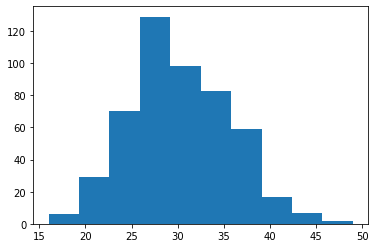

In [29]:
plt.hist(mutations)

In [35]:
standard_deviation = np.std(mutations)
print("Standard deviation:", standard_deviation)
mean = np.mean(mutations)
print("Mean:", mean)
variance = np.var(mutations)
print("Variance:",variance)

Standard deviation: 5.4998341793185
Mean: 30.268
Variance: 30.248176


---

Note: For purposes of the assignment you can deleted all the cells from here to the end

## A more sophisticated simulation

Simulating 1000 genome replications as we did above doesn't take into account one very important aspect of real biological populations that is important for thinking about genome evolution -- the genomes in an expanding population are related to each other by lineages.  

Creating a simulation that tracks lineages requires more advanced techniques, so rather than asking you to solve this problem yourself I'll provide a simple implementation that accomplishes this. I've heavily annotated my implementation with explanatory comments.

This simulation accounts for only growth.
Must account for:
- death rate
- selection
- carrying capacity

In [ ]:
# We want to track the different genomic variants that arise over time
# To do this compactly, we'll create objects to represent these genome variants.
#
# These objects will have 4 attributes:
# 1. name -- an integer value
# 2. parent -- which prior variant they arose from
# 3. generation -- the generation of the simulation in which the variant arose
# 4. mutated_sites -- the set of sites with mutations (relative to the founder invidivual)
#
# A very simple way to represent an object with attributes is using a "Named Tuple"
# The function for creating named tuples is in the collections modules (one of the standard python modules).
# The code below illustrates how to created a class for generating a named tuple called "Variant" with
# the attributes we described above.


from collections import namedtuple
Variant = namedtuple("Variant", ["name", "parent", "generation", "mutated_sites"])

In [ ]:
# Now we setup the key data structures and parameters for our simulation

ngens = 10             # number of replicative generations to simulate
genomesize = 30000     # size of genome
mutation_rate = 1e-6   # per nucleotide mutation rate

# initially we have just one genome variant -- the "founder"
founder = Variant(name=0, parent=None, generation=0, mutated_sites=[])

# we're going to keep track of the different variants that arise using a dictionary
# keyed by the variant names
variants = {0:founder}

# popn will track the actual genomes in the population, each entry is an integer
# corresponding to the name of one of the genome variants.  Initially we have just
# the founder genome
popn = [0]

for i in range(ngens):
    # a temporary list to hold the new genomes that are generated in a single round of replication
    daughters = []   
    
    # we'll refer to the genomes already in the population as "mothers" because each
    # existing genome will give rise to one new (daughter) genome
    for mother in popn: 
        
        # generate True/False values for every site in the genome, where True indicates a mutation occured
        daughter_genome = np.random.random(size=genomesize) < mutation_rate
        
        # get the indices of any sites where mutations occurred
        daughter_mutations = np.argwhere(daughter_genome).flatten()
        
        # if no mutations, daughter same as mother so add clone of mother to popn
        if len(daughter_mutations) == 0:  
            daughters.append(mother)           
        
        # if at least one new mutation, create a new variant and add this novel daughter to popn
        else:                             
            name = len(variants)  # next unused name 
            parent_variant = variants[mother] # mother variant
            
            # mutations = mother mutations + new mutations
            mutations = parent_variant.mutated_sites + daughter_mutations.tolist()
            
            # create the new variant
            newvariant = Variant(name = name, parent = mother, generation = i, 
                                 mutated_sites = mutations)
            
            # stick the variant in our variant dict
            variants[name] = newvariant
            
            # append the daughter to the daughters list
            daughters.append(name)
            
    # having created all the new daughters, add them to the existing popn and repeat
    popn = popn + daughters
            
            


In [ ]:
variants # the unique genotypes in the popn

After evaluating the code above, the `variants` dictionary and `popn` list   represent the different genotypes and the correposponding makeup of the popn after `ngen` number of generations.

In [ ]:
variants  # the genotypes (genome variants) in the popn

We can enumerate the genotypes and get their counts in the population as follows:

In [ ]:
np.unique(popn, return_counts=True)

We can create a visuall representation of the lineages in our simulation by using a package called [networkx](https://networkx.github.io/), which is a Python library for working with graph or network structures (networkx is not installed by default so you'll need to install networkx using the Anaconda Navigator or via `conda` on the command line).

Tree stucture are a special case of graphs (as used in graph theory).  Here we create a directed graph to represent the relationship among the lineages in our simulation:

In [ ]:
import networkx as nx

tree = nx.DiGraph()  
for variant in variants.values():
    tree.add_node(variant.name)  # each genotype is a node
    if variant.parent is not None:
        tree.add_edge(variant.parent, variant.name)  # create an edge pointing to each node from it's parent

In [ ]:
# draw the tree, using a layout structure
pos = nx.layout.kamada_kawai_layout(tree)
nx.draw(tree, pos=pos, with_labels=True)
#nx.draw_networkx()

The following layout does a better job with tree like structures but requires another library (pygraphviz) and the installation of an external program called graphviz.

In [ ]:
# commented out because requires pygraphviz
# draw the tree, using a layout structure that should produce visually appealing results
# pos = nx.nx_agraph.pygraphviz_layout(tree, prog="twopi", args="")
# nx.draw(tree, pos=pos, with_labels=True)